In [20]:
import pandas as pd
import matplotlib.pyplot as plt

Data from [here](https://data.kcmo.org/Crime/KCPD-Crime-Data-2019/pxaa-ahcm)

In [3]:
ls ../../Data

KCPD_Crime_Data_2019.csv  flights.csv*


In [4]:
df = pd.read_csv('../../Data/KCPD_Crime_Data_2019.csv')

In [5]:
df.head()

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
0,KC19019972,03/19/2019,08:48,03/19/2019,08:48,03/19/2019,09:33,Vehicular – Non-Injury,NaN,NaN,...,64161.0,PC1239,SCP,N,ARR CHA VDR,W,F,41.0,False,NaN
1,KC19020439,03/20/2019,17:11,03/20/2019,17:30,NaN,NaN,City/Municipal Warrant Arrest,NaN,NaN,...,64068.0,NaN,OSPD,N,ARR CHA SUS,W,M,31.0,False,NaN
2,KC19021179,03/23/2019,09:40,03/23/2019,09:40,NaN,NaN,Vehicular – Injury,NaN,NaN,...,64155.0,PC0277,NPD,N,ARR CHA VDR,W,M,41.0,False,NaN
3,KC19021555,03/25/2019,07:35,03/25/2019,09:09,NaN,NaN,Possession/Sale/Distribution of a Controlled S...,35A,Drug / Narcotic Violations,...,64108.0,PJ1831,CPD,N,ARR CHA SUS,B,M,31.0,False,NaN
4,KC19021815,03/26/2019,06:04,03/26/2019,07:20,03/26/2019,08:00,Stealing – Shoplift,23C,Shoplifting,...,64133.0,PJ3601,EPD,N,VIC,NaN,NaN,NaN,False,NaN


### What is a Time Series?
A time series is a sequence of numerical data points in successive order.

In [8]:
df['Offense'].value_counts().head(5)

Domestic Violence Assault (Non-Aggravated)    6232
Assault (Aggravated)                          4558
Stolen Auto                                   4504
Stealing – Shoplift                           4435
Property Damage                               4344
Name: Offense, dtype: int64

I am going to look at the daily number of property damage incidents in Kansas City for 2019 

In [9]:
df_pd = df[df['Offense'] == 'Property Damage']
df_pd.head()

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
5,KC19021991,03/26/2019,17:49,03/25/2019,20:10,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,...,64133.0,NaN,MPD,N,VIC,B,M,61.0,False,NaN
30,KC19024382,04/04/2019,08:27,04/03/2019,20:56,04/03/2019,21:04,Property Damage,290,Vandalism/Destruction of Property,...,64108.0,PJ2072,CPD,N,VIC,NaN,NaN,NaN,False,NaN
44,KC19026110,04/10/2019,14:36,04/05/2019,12:30,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,...,64118.0,PC1221,SCP,N,VIC,NaN,NaN,NaN,False,NaN
63,KC19027946,04/17/2019,09:07,04/15/2019,18:00,04/15/2019,23:50,Property Damage,290,Vandalism/Destruction of Property,...,64119.0,PC1231,SCP,N,VIC,W,M,69.0,False,NaN
139,KC19037132,05/20/2019,10:54,05/10/2019,01:00,05/10/2019,01:00,Property Damage,290,Vandalism/Destruction of Property,...,64127.0,NaN,EPD,N,SUS,B,M,NaN,False,NaN


I need a column for date 

In [10]:
df_pd.columns

Index(['Report_No', 'Reported_Date', 'Reported_Time', 'From_Date', 'From_Time',
       'To_Date', 'To_Time', 'Offense', 'IBRS', 'Description', 'Beat',
       'Address', 'City', 'Zip Code', 'Rep_Dist', 'Area', 'DVFlag',
       'Involvement', 'Race', 'Sex', 'Age', 'Firearm Used Flag', 'Location'],
      dtype='object')

In [11]:
df_pd.isnull().sum()

Report_No               0
Reported_Date           0
Reported_Time           0
From_Date               0
From_Time               0
To_Date              2413
To_Time              2418
Offense                 0
IBRS                  341
Description           341
Beat                   76
Address                 0
City                    0
Zip Code              801
Rep_Dist             1599
Area                  118
DVFlag                  0
Involvement             0
Race                  796
Sex                   752
Age                  1119
Firearm Used Flag       0
Location              595
dtype: int64

I'm going to use `Reported_Date` Because there is not any missing values 

In [ ]:
# convert Reported_Date to pandas date_time

In [12]:
df_pd.set_index('Reported_Date', inplace = True)
df_pd.head()

,Report_No,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,Beat,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
Reported_Date,,,,,,,,,,,,,,,,,,,,,
03/26/2019,KC19021991,17:49,03/25/2019,20:10,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,212,...,64133.0,NaN,MPD,N,VIC,B,M,61.0,False,NaN
04/04/2019,KC19024382,08:27,04/03/2019,20:56,04/03/2019,21:04,Property Damage,290,Vandalism/Destruction of Property,115,...,64108.0,PJ2072,CPD,N,VIC,NaN,NaN,NaN,False,NaN
04/10/2019,KC19026110,14:36,04/05/2019,12:30,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,632,...,64118.0,PC1221,SCP,N,VIC,NaN,NaN,NaN,False,NaN
04/17/2019,KC19027946,09:07,04/15/2019,18:00,04/15/2019,23:50,Property Damage,290,Vandalism/Destruction of Property,632,...,64119.0,PC1231,SCP,N,VIC,W,M,69.0,False,NaN
05/20/2019,KC19037132,10:54,05/10/2019,01:00,05/10/2019,01:00,Property Damage,290,Vandalism/Destruction of Property,331,...,64127.0,NaN,EPD,N,SUS,B,M,NaN,False,NaN


Now I want the number of incidents per day

In [13]:
df_pd.resample('D').count()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [14]:
df_pd.index 

Index(['03/26/2019', '04/04/2019', '04/10/2019', '04/17/2019', '05/20/2019',
       '05/25/2019', '05/27/2019', '06/15/2019', '06/16/2019', '06/18/2019',
       ...
       '12/24/2019', '12/14/2019', '12/04/2019', '12/09/2019', '11/26/2019',
       '12/13/2019', '12/18/2019', '12/12/2019', '11/20/2019', '12/17/2019'],
      dtype='object', name='Reported_Date', length=4344)

In [15]:
df_pd.index = pd.to_datetime(df_pd.index )

In [16]:
df_pd.index

DatetimeIndex(['2019-03-26', '2019-04-04', '2019-04-10', '2019-04-17',
               '2019-05-20', '2019-05-25', '2019-05-27', '2019-06-15',
               '2019-06-16', '2019-06-18',
               ...
               '2019-12-24', '2019-12-14', '2019-12-04', '2019-12-09',
               '2019-11-26', '2019-12-13', '2019-12-18', '2019-12-12',
               '2019-11-20', '2019-12-17'],
              dtype='datetime64[ns]', name='Reported_Date', length=4344, freq=None)

In [18]:
df_pd.resample('D')['Report_No'].count()

Reported_Date
2019-03-18     2
2019-03-19     2
2019-03-20     3
2019-03-21     4
2019-03-22     0
              ..
2019-12-27    16
2019-12-28     8
2019-12-29    24
2019-12-30     5
2019-12-31    13
Freq: D, Name: Report_No, Length: 289, dtype: int64

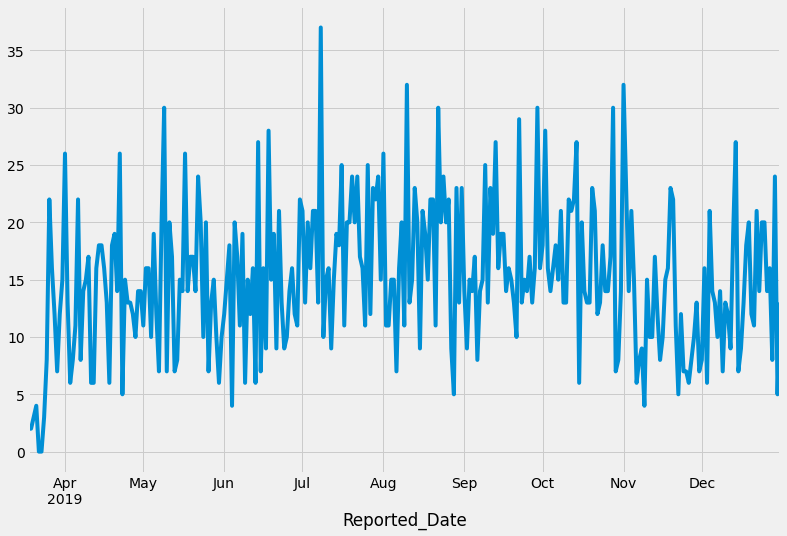

In [22]:
with plt.style.context('fivethirtyeight'):
    df_pd.resample('D')['Report_No'].count().plot(kind = 'line', figsize = (12, 8))

#### What Jumps Out?
- Data Starts in March for some reason 

Sometimes there will be no values for a particular date.  I can check this by doing the following 

In [29]:
df_daily = df_pd.resample('D')['Report_No'].count()
df_daily.isnull().sum()

0

Look at the distribution of number of incidents 

Text(0.5, 0, 'Number of Incidents')

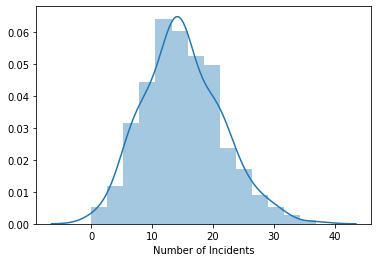

In [32]:
import seaborn as sns 
sns.distplot(df_daily)
plt.xlabel('Number of Incidents')

## Stationarity

A time series is said to be stationary if its statistical properties such as mean, variance, etc. remain constant over time. 

Why is it important? Because most time series models work on the assumption that **the time series are stationary**.

In [44]:
roll_mean = df_daily.rolling(window=7).mean()
roll_std = df_daily.rolling(window=7).std()

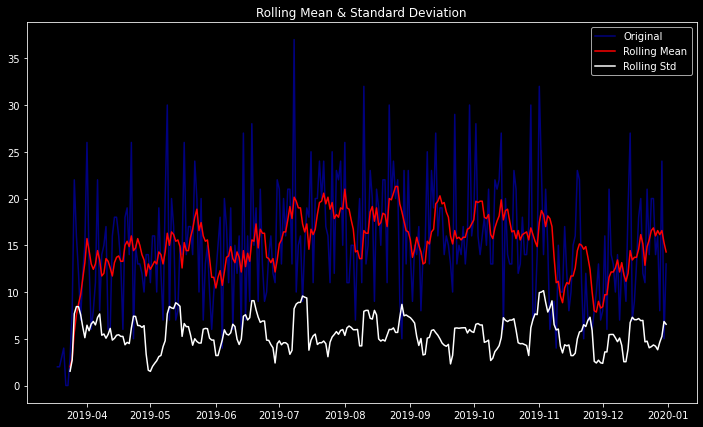

In [45]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(12,7))
    plt.plot(df_daily, color='blue', label='Original', alpha = 0.5)
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='white', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

Another option is to run a [Dickey-Fuller Test](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)  

In [97]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df_daily)
dftest

(-7.710681455914594,
 1.2663057571336074e-11,
 2,
 286,
 {'1%': -3.4534232986669546,
  '5%': -2.8716994185534745,
  '10%': -2.5721833625116144},
 1753.5811441101437)

P-Value is below 0.05, so we can reject the null hypothesis that the time series is non-stationary 

Here's a dataset from Learn.co, lets see how it does with the Dickey Fuller Test 

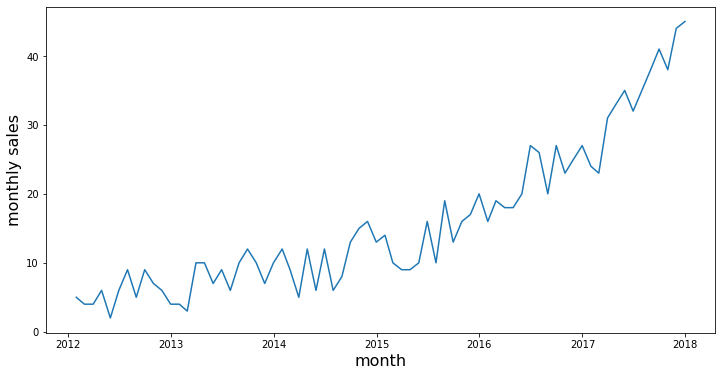

In [48]:
import numpy as np

years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
data = pd.Series(sales+bigger+6, index=index)
ts = data
fig = plt.figure(figsize=(12,6))
plt.plot(data)
plt.xlabel('month', fontsize=16)
plt.ylabel('monthly sales', fontsize=16)
plt.show()

In [49]:
dftest = adfuller(ts)
dftest

(3.761375741674095,
 1.0,
 8,
 63,
 {'1%': -3.5386953618719676,
  '5%': -2.9086446751210775,
  '10%': -2.591896782564878},
 314.84474355172597)

Examples of [Non-Stationarity](https://learn.co/tracks/module-4-data-science-career-2-1/big-data-deep-learning-and-natural-language-processing/section-37-working-with-time-series-data/types-of-trends)

Now lets see if we can remove that trend 

In [53]:
ts_diff = ts.diff(periods=1)
roll_mean = ts_diff.rolling(window=12).mean()
roll_std = ts_diff.rolling(window=12).std()

In [101]:
ts_diff.head()

2012-01-31    NaN
2012-02-29   -1.0
2012-03-31    0.0
2012-04-30    2.0
2012-05-31   -4.0
Freq: M, dtype: float64

In [103]:
ts.head()

2012-01-31    5
2012-02-29    4
2012-03-31    4
2012-04-30    6
2012-05-31    2
Freq: M, dtype: int64

It subtracts the value from the previous day 

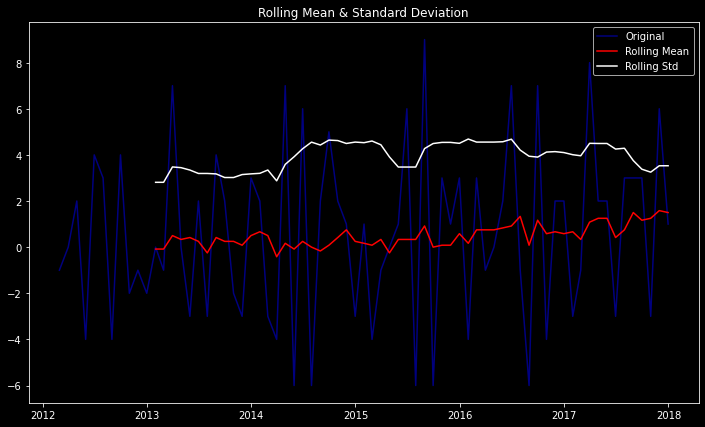

In [104]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(12,7))
    plt.plot(ts_diff, color='blue', label='Original', alpha = 0.5)
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='white', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

In [55]:
dftest = adfuller(ts_diff)
dftest

MissingDataError: exog contains inf or nans

Why do I have NaNs? 

In [57]:
ts_diff.head(2)

2012-01-31    NaN
2012-02-29   -1.0
Freq: M, dtype: float64

In [58]:
dftest = adfuller(ts_diff.dropna())
dftest

(-6.455929660591099,
 1.4835154528970987e-08,
 2,
 68,
 {'1%': -3.530398990560757,
  '5%': -2.9050874099328317,
  '10%': -2.5900010121107266},
 311.5103050425881)

Now lets look at a decomposition of my original crime dataset 

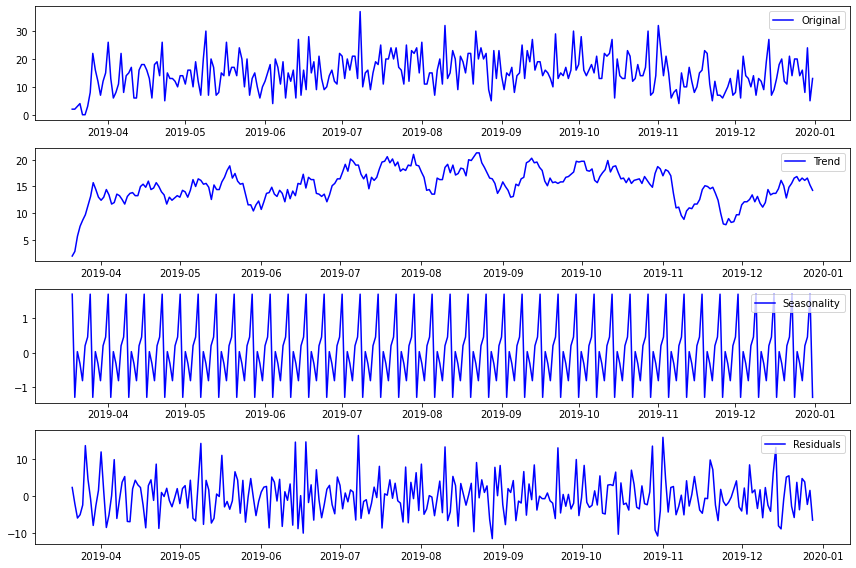

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_daily)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_daily, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Residuals: The random variation in the series.

<img src="images/trendseasonal.png" alt="Drawing" style="width: 800px;"/>

In [66]:
seasonal[:30]

Reported_Date
2019-03-18    1.696653
2019-03-19   -1.285490
2019-03-20    0.035938
2019-03-21   -0.306135
2019-03-22   -0.804393
2019-03-23    0.206060
2019-03-24    0.457367
2019-03-25    1.696653
2019-03-26   -1.285490
2019-03-27    0.035938
2019-03-28   -0.306135
2019-03-29   -0.804393
2019-03-30    0.206060
2019-03-31    0.457367
2019-04-01    1.696653
2019-04-02   -1.285490
2019-04-03    0.035938
2019-04-04   -0.306135
2019-04-05   -0.804393
2019-04-06    0.206060
2019-04-07    0.457367
2019-04-08    1.696653
2019-04-09   -1.285490
2019-04-10    0.035938
2019-04-11   -0.306135
2019-04-12   -0.804393
2019-04-13    0.206060
2019-04-14    0.457367
2019-04-15    1.696653
2019-04-16   -1.285490
Freq: D, Name: Report_No, dtype: float64

Lets see what day it increases on 

In [75]:
pd_daily = pd.DataFrame(df_daily)
pd_daily['Day_of_Week'] = pd_daily.index.day_name()

In [76]:
pd_daily.head()

,Report_No,Day_of_Week
Reported_Date,,
2019-03-18,2,Monday
2019-03-19,2,Tuesday
2019-03-20,3,Wednesday
2019-03-21,4,Thursday
2019-03-22,0,Friday


In [82]:
df_dow = pd.DataFrame(pd_daily.groupby('Day_of_Week')['Report_No'].sum())

In [83]:
df_dow.head()

,Report_No
Day_of_Week,
Friday,585
Monday,684
Saturday,628
Sunday,650
Thursday,605


In [92]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
key = df_dow.index.map(mapping)

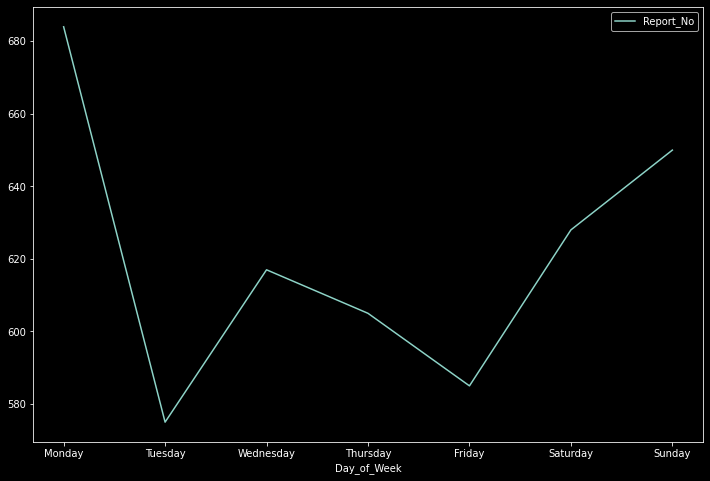

In [96]:
with plt.style.context('dark_background'):
    df_dow.iloc[key.argsort()].plot(kind = 'line', figsize = (12, 8))

In [109]:
seasonal[:7]

Reported_Date
2019-03-18    1.696653
2019-03-19   -1.285490
2019-03-20    0.035938
2019-03-21   -0.306135
2019-03-22   -0.804393
2019-03-23    0.206060
2019-03-24    0.457367
Freq: D, Name: Report_No, dtype: float64

## Further Details 
- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/#:~:text=Trend%3A%20The%20increasing%20or%20decreasing,random%20variation%20in%20the%20series.